### During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA
### E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

I last had a Television way back in 2009.I cater to my needs through internet and youtube.Netflix has ccome into India recently.Through this dataset we will try to Learn more about NetFlix.In this Kernel I will be covering following topics 

1.Data Import and Preprocessing 

2.Exploratory Data Analysis 

3.Feature Engineering 

4.Conclusion 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/netflix-shows/netflix_titles.csv


# 1.Data Import and Preprocessing 

**Importing Python Modules**

In [2]:
!pip install plotly
!pip install cufflinks 
!pip install textblob

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')

In [4]:
import plotly as py
import cufflinks as cf

In [5]:
from plotly.offline import iplot

In [6]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

**Importing the Dataset**

In [7]:
df=pd.read_csv('../input/netflix-shows/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**Summary of Dataset**

In [8]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 7787
Columns  : 12

Features :
     : ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Missing values    : 3631

Unique values :  
 show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


In [9]:
#df.info()

In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
df=df.dropna()

# 2.Exploratory Data Analysis 

### Content Update

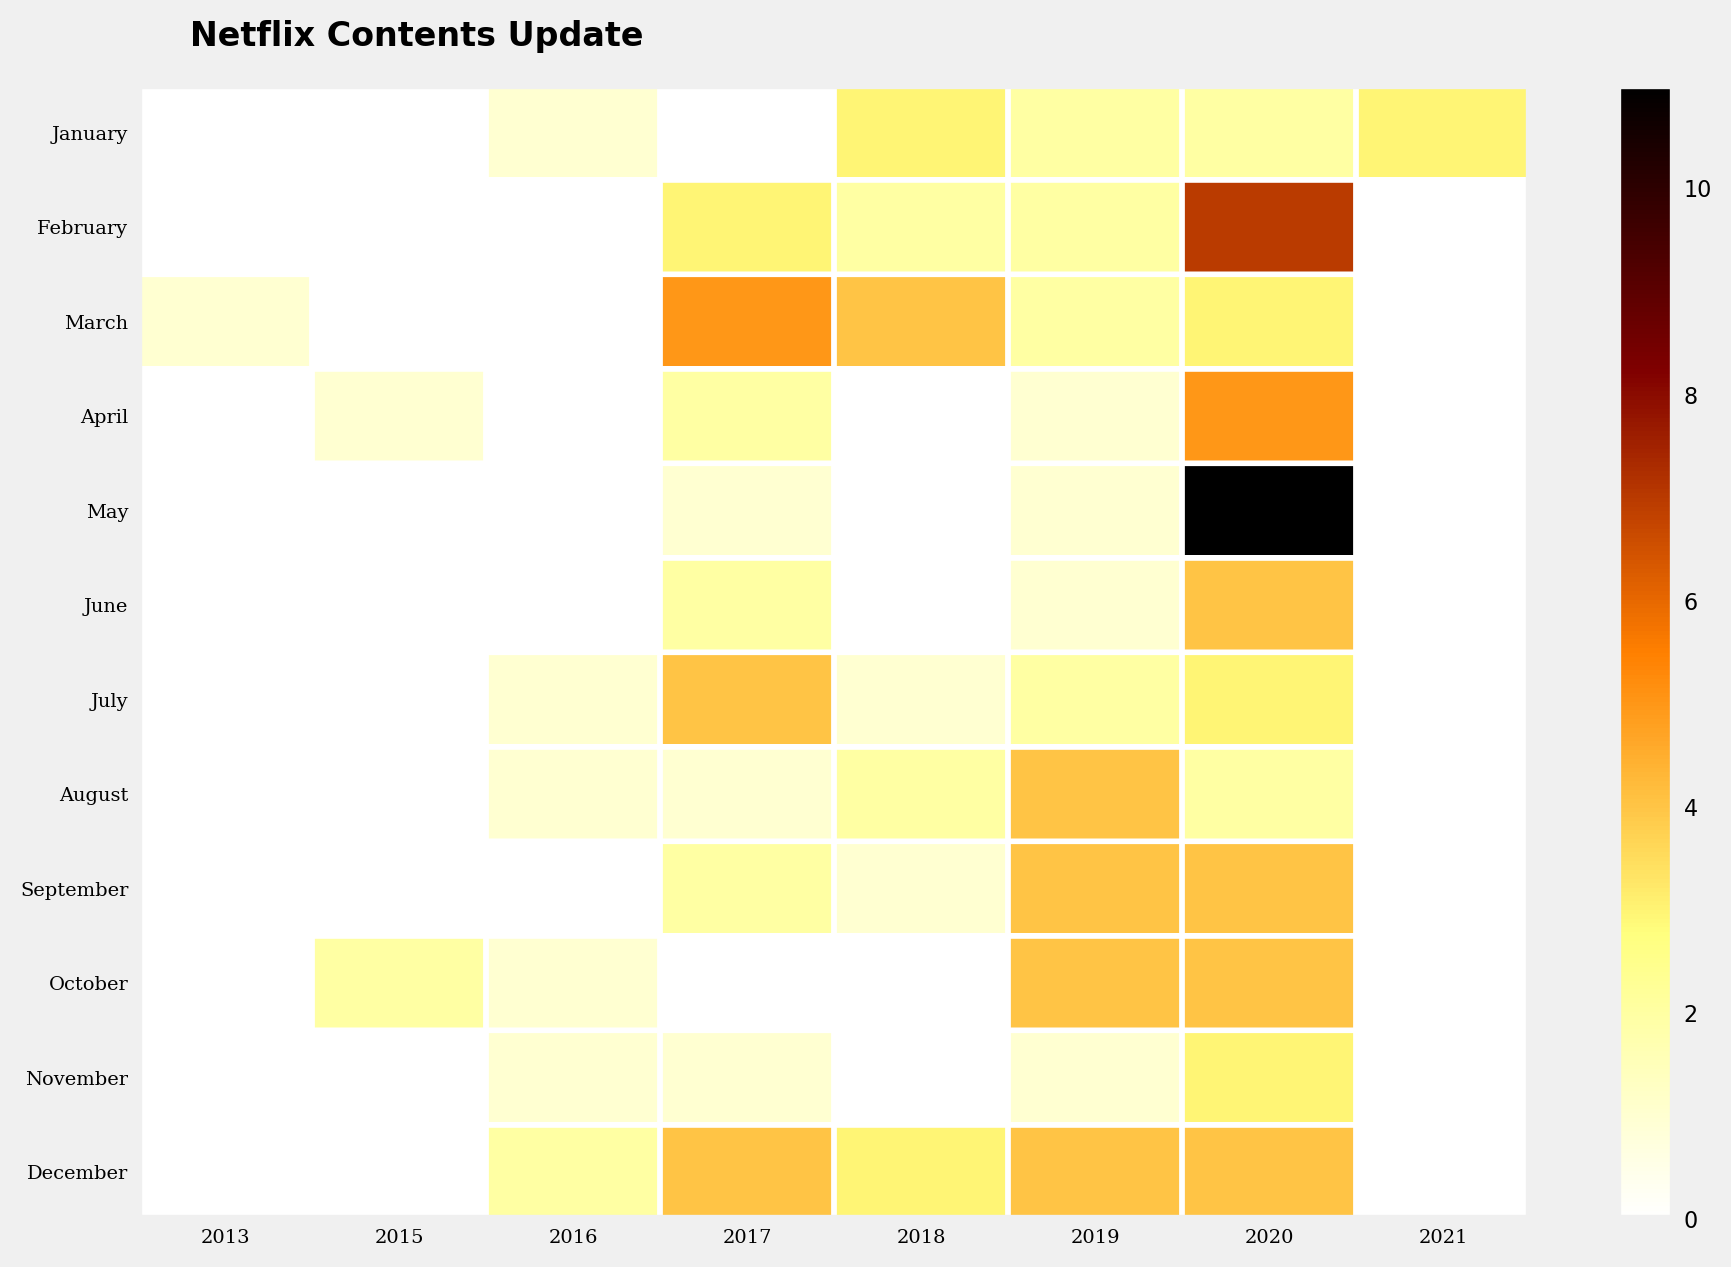

In [12]:
df_shows=df[df['type']=='TV Show']
df_movies=df[df['type']=='Movie']
df_date = df_shows[['date_added']].dropna()
df_date['year'] = df_date['date_added'].apply(lambda x : x.split(', ')[-1])
df_date['month'] = df_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
dfu = df_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(dfu, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(dfu.columns), 1), dfu.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(dfu.index), 1), dfu.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

We can see that for the year 2019 more content update happened in the month of August and May.

In [13]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);
#df.year_added = df.year_added.astype(float)
#df.style.set_precision(0)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1,2017,7


### Type

In [14]:
df['type'].value_counts();

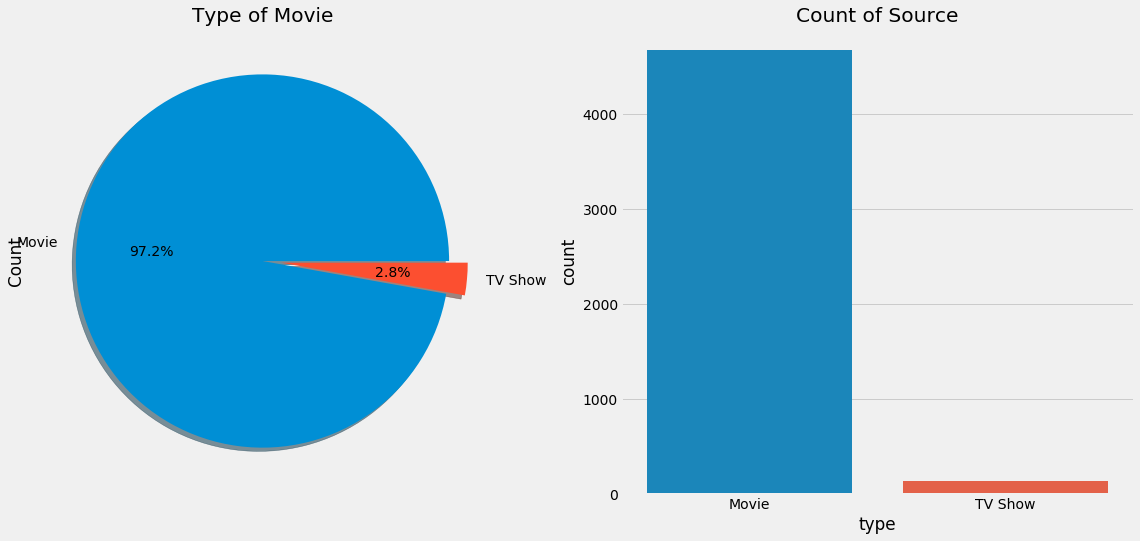

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Type of Movie')
ax[0].set_ylabel('Count')
sns.countplot('type',data=df,ax=ax[1],order=df['type'].value_counts().index)
ax[1].set_title('Count of Source')
plt.show()

So 98 % items in the dataset are movies and remaining small percentage is TV show

### Movie Rating

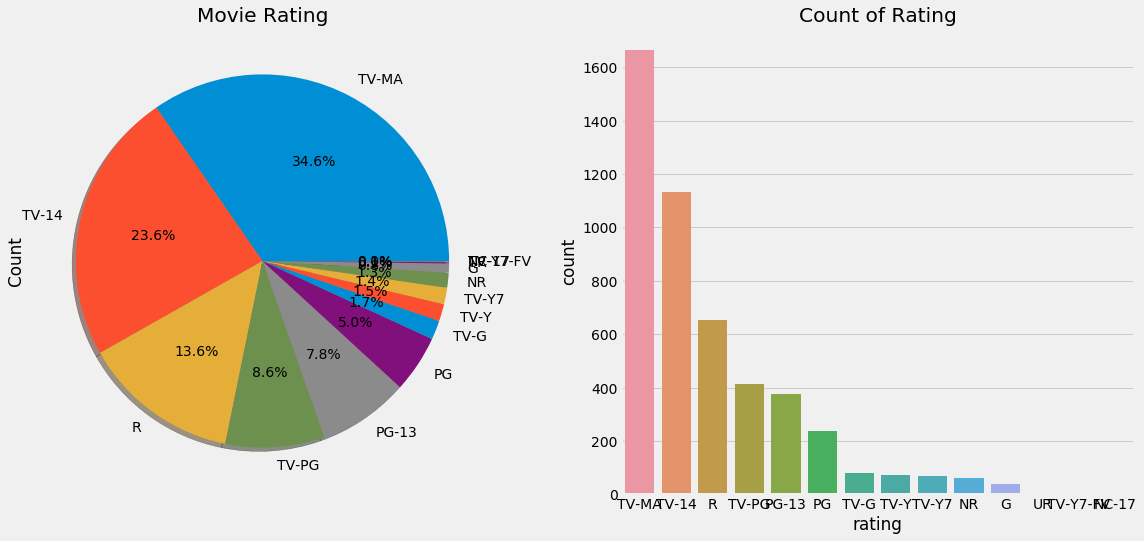

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Movie Rating')
ax[0].set_ylabel('Count')
sns.countplot('rating',data=df,ax=ax[1],order=df['rating'].value_counts().index)
ax[1].set_title('Count of Rating')
plt.show()

33% Fall in catogery TV-MA ("TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.)

23% fall in catigery TV-14 (Programs rated TV-14 contains material that parents or adult guardians may find unsuitable for children under the age of 14.

12.5 % fall in category TV-PG (TV-PG: Parental guidance suggested. This program contains material that parents may find unsuitable for younger children)

### Country

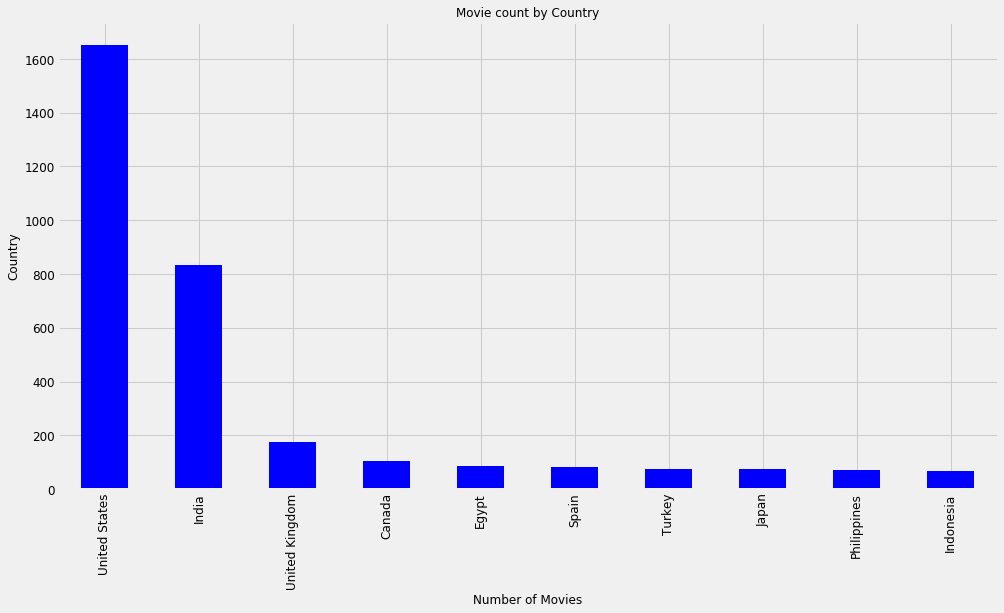

In [17]:
group_country_movies=df.groupby('country')['show_id'].count().sort_values(ascending=False).head(10);
plt.subplots(figsize=(15,8));
group_country_movies.plot('bar',fontsize=12,color='blue');
plt.xlabel('Number of Movies',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Movie count by Country',fontsize=12)
plt.ioff()

So we can say most movies are from Hollywood,Bollywood and British Film industry

### Date

**How many Movies Per Year?**

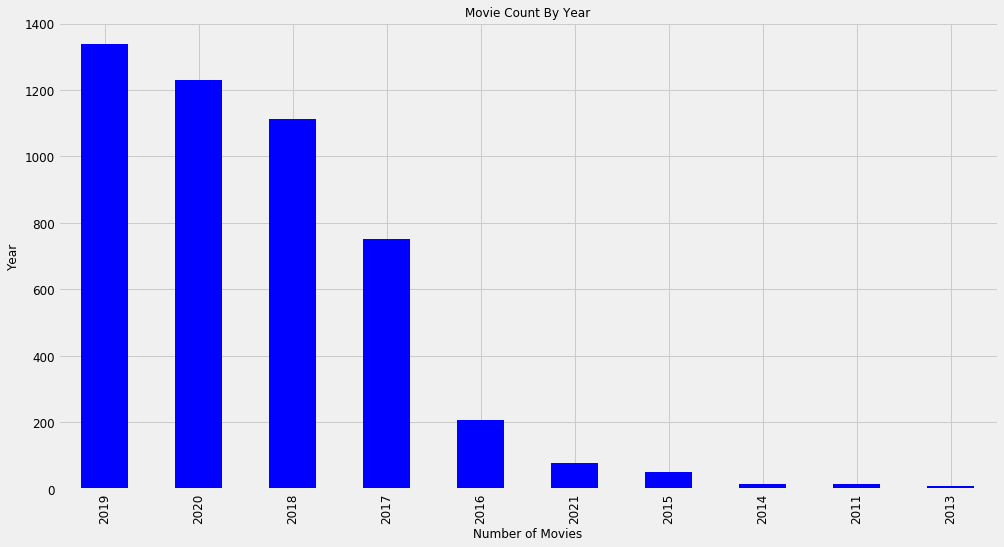

In [18]:
group_country_movies=df.groupby('year_added')['show_id'].count().sort_values(ascending=False).head(10);
plt.subplots(figsize=(15,8));
group_country_movies.plot('bar',fontsize=12,color='blue');
plt.xlabel('Number of Movies',fontsize=12)
plt.ylabel('Year',fontsize=12)
plt.title('Movie Count By Year',fontsize=12)
plt.ioff()

Every Year the movie Count is increasing indicating that popularity of Netfilx is increasing every years.

**Which Month has more movies Added?**

In [19]:
df['month_added'].value_counts();

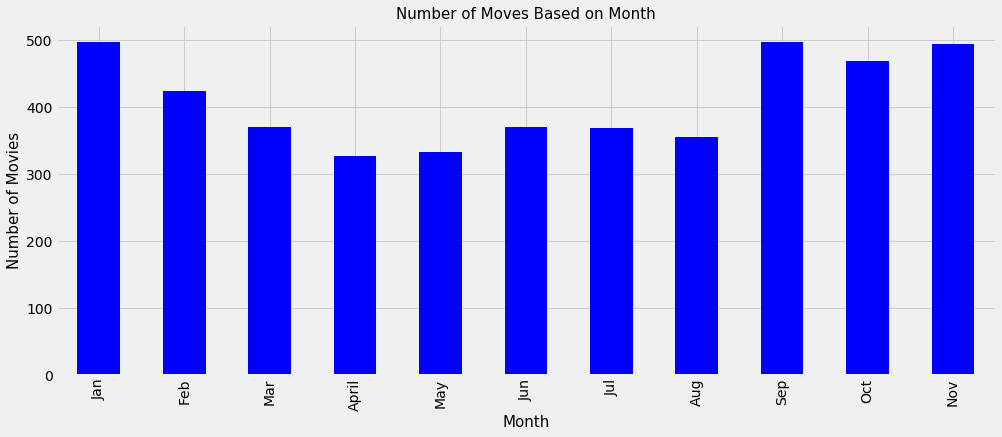

In [20]:
ax=df.groupby('show_id')['month_added'].unique().value_counts().iloc[:-1].sort_index().plot('bar',color='blue',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Movies',fontsize=15)
ax.set_title('Number of Moves Based on Month',fontsize=15)
ax.set_xticklabels(('Jan','Feb','Mar','April','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'));
plt.show()


We see more movies are added in the month of September followed by October and March.

**Duration of Movie**

In [21]:

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
#df.head()

**Which are most popular words for Title?**

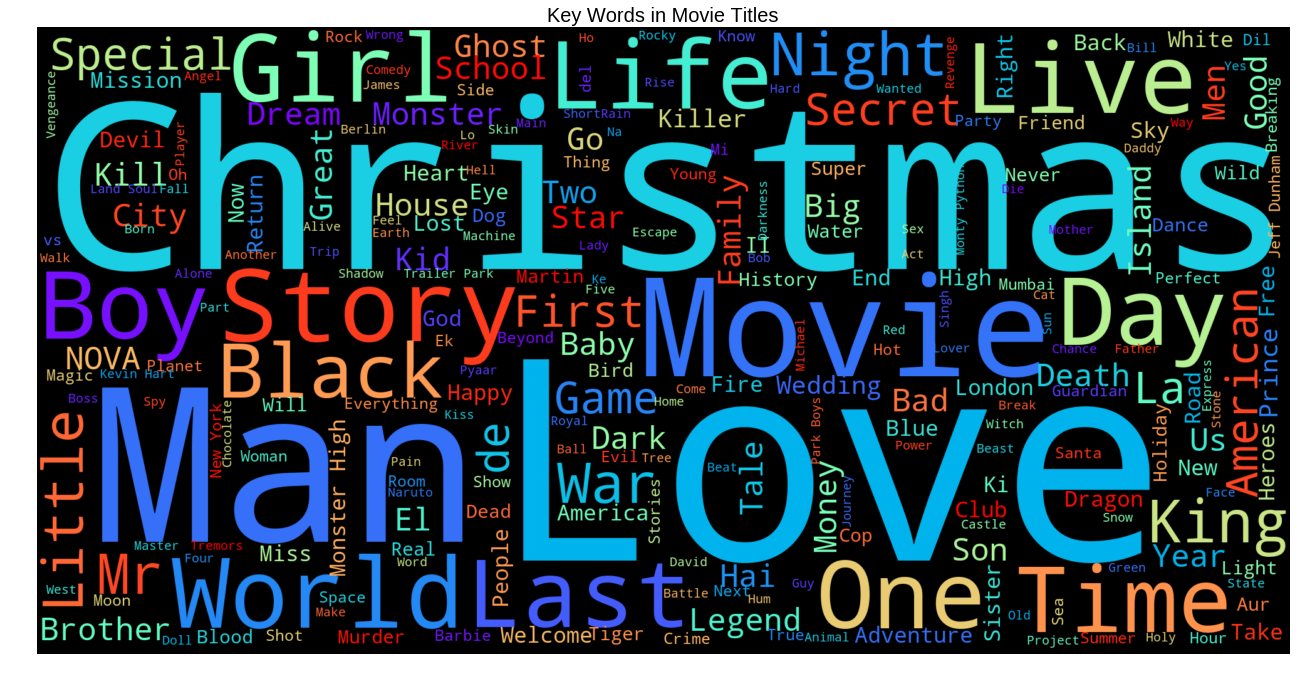

In [22]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from PIL import Image
plt.style.use('seaborn')
wrds1 = df["title"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(stopwords=STOPWORDS,scale=5,max_words=1000,colormap="rainbow",background_color="black").generate(" ".join(wrds1))
plt.figure(figsize=(20,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Movie Titles",color='black',fontsize=20)
plt.show()

Love,Man,Christmas etc are some of the most prominent words for movie Title 

### Rating 

In [23]:
df['rating'].value_counts().iplot(kind='bar',xTitle='Rating',yTitle='Count',title='Bar Chart of Rating')

We see that most movies fall in the category 

**1.TV-MA:** Mature audience only. This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.

**2.TV-14:** Parents strongly cautioned. This program contains some material that many parents would find unsuitable for children under 14 years of age.

**3.R:** Restricted, Children Under 17 Require Accompanying Parent or Adult Guardian. This rating means the film contains adult material such as adult activity, harsh language, intense graphic violence, drug abuse and nudity.

**4.TV-PG:** Programs rated TV-PG may contain some material that parents or guardians may find inappropriate for younger children. Programs assigned a TV-PG rating may include some inappropriate language, very little sexual content, suggestive dialogue, and/or mild violence.

**PG-13:** Parents Strongly Cautioned, Some Material May Be Inappropriate for Children Under 13. This rating is a stronger caution for parents that content included may not be appropriate for children under 13 (pre-teen ages). This may include stronger language, extended violence or sexual situations and drug-use

### Description?

In [24]:
#df['description'][1]
#df['length']=df['description'].str.len()
df.dropna();

### Data Cleaning 

In [25]:
#' '.join(df['description'].tolist())

### Contractions

In [26]:
contractions = {
    "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

In [27]:
def cont_to_exp(x):
    if type(x) is str:
        x =x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x
        

In [28]:
x = "I don't know what date is today, I am 5'8"

In [29]:
print(cont_to_exp(x))

I do not know what date is today, I am 5'8


Here we have written a code by which we can expand the contractions used in the text.We can apply this cleaning technique to our description column.

In [30]:
%%time 
df['description'] = df['description'].apply(lambda x: cont_to_exp(x))

CPU times: user 253 ms, sys: 5 µs, total: 253 ms
Wall time: 251 ms


In [31]:
#print(' '.join(df['description'].tolist()))

So with the above code we have managed to convert the contractions and expanded them to full form.

# 3.Feature Engineering 

In [32]:
from textblob import TextBlob
df['polarity'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

### Descripion Length

In [33]:
df['desc_len'] = df['description'].apply(lambda x: len(x))

### Word Count

In [34]:
df['word_count'] = df['description'].apply(lambda x: len(x.split()))

### Average Word Length

In [35]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0 
    for word in words:
        word_len = word_len + len(word)
        
    return word_len/len(words)    

In [36]:
df['avg_word_len'] = df['description'].apply(lambda x: get_avg_word_len(x))

In [37]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,season_count,polarity,desc_len,word_count,avg_word_len
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12,,-0.425,148,24,5.208333
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12,,-0.475,150,25,5.040000
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11,,0.100,145,23,5.347826
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020,1,,0.900,143,22,5.545455
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1,2017,7,1,-0.500,149,23,5.521739


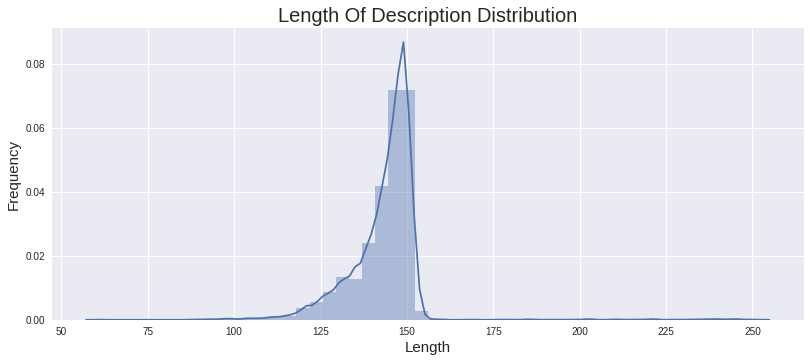

In [38]:
plt.figure(figsize=(12,5))

g = sns.distplot(df['desc_len'])
g.set_title("Length Of Description Distribution", fontsize=20)
g.set_xlabel("Length", fontsize=15)
g.set_ylabel("Frequency", fontsize=15)


plt.show()

We can see that the many reviews are in te ranged 140 to 150 words.

### Length of Description Vs Rating

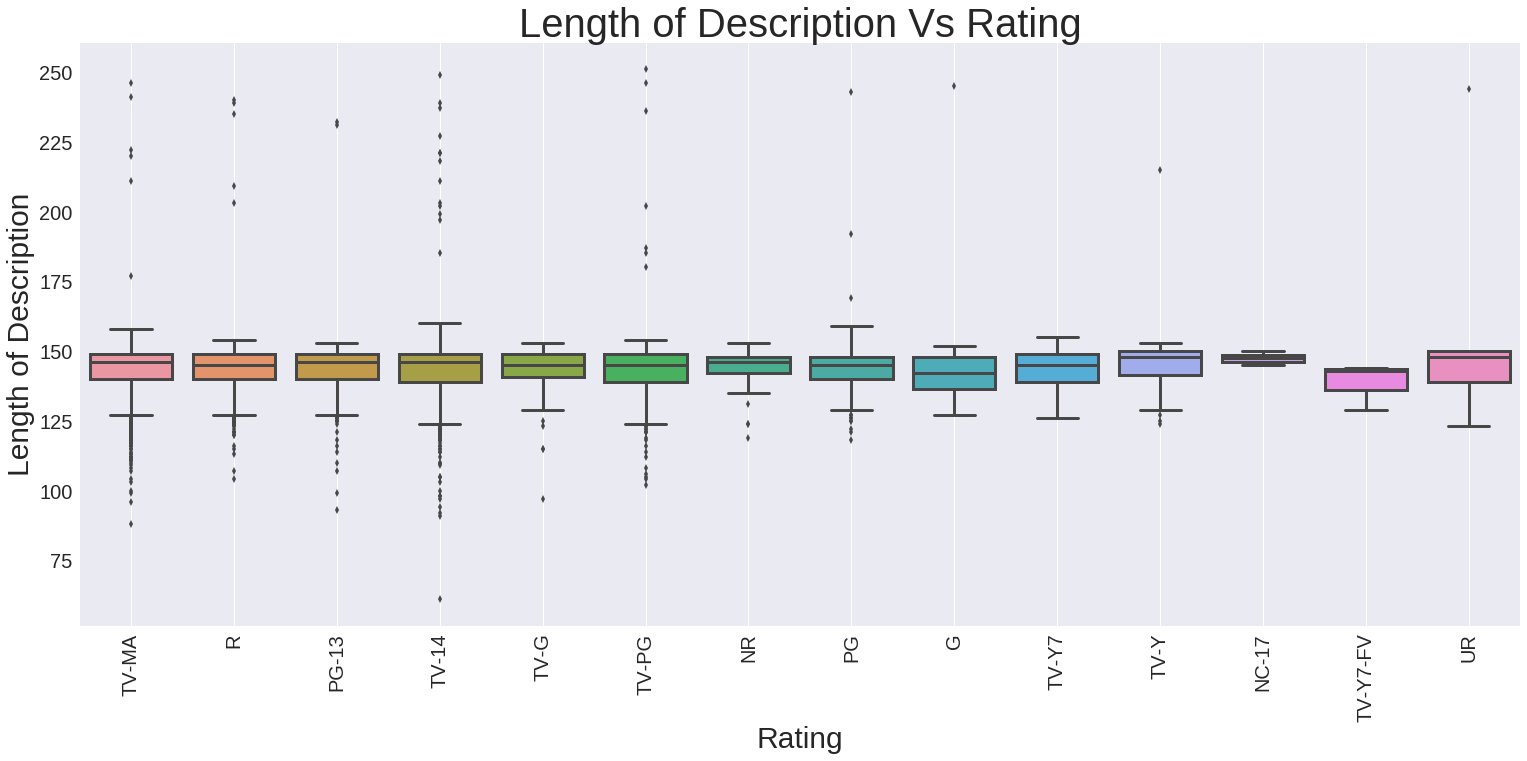

In [39]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="rating", y="desc_len", data=df,width=0.8,linewidth=3)
ax.set_xlabel('Rating',fontsize=30)
ax.set_ylabel('Length of Description',fontsize=30)
plt.title('Length of Description Vs Rating',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)
ax.tick_params(axis='y',labelsize=20,rotation=0)
plt.grid()
plt.ioff()

Suprisingly the mean length of the description across all the ratings remain same.

### Distribution of Sentiment Polarity

In [40]:
df['polarity'].iplot(kind='hist',colors='red',bins=50,xTitle='Polarity',yTitle='Count',linecolor='black',title='Sentiment Polarity Distribution')

So looking at the distribution of polarity we can say that the sentiment expressed about the movies in the description is slightly towards positive.We can almost conclude that people are not happy with at least 40% of the movies.

### Distribution of description text lenght

In [41]:
df['desc_len'].iplot(kind='hist',colors='red',bins=50,xTitle='Desc_Lenght',yTitle='Count',linecolor='black',title='Description Text Length Distribution')

We had earlier ploted the distplot which showed us similar result.Most of the text in the description column has 140-150 words.Very few description has more than 155 words.

### Distribution of description text word length

In [42]:
df['word_count'].iplot(kind='hist',colors='red',bins=50,xTitle='Word_Count',yTitle='Count',linecolor='black',title='Description Word Length Distribution')

Most of the movies have description which is i between 20-30 words.

### Distribution of description text average word length

In [43]:
df['avg_word_len'].iplot(kind='hist',colors='red',bins=50,xTitle='Avg_Word_Len',yTitle='Count',linecolor='black',title='Description Average Word Length Distribution')

So from the distribution we can clearly see that for the description of the movie the average word length used is generally between 4 to 6.5.

### Distribution of Unigram

In [44]:
x = ['this is a test example']

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
def get_top_n_words(x,n):
    vec = CountVectorizer(ngram_range=(1,1),stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word,sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]
    
    #vec.vocabulary_.items()

In [47]:
print(get_top_n_words(x,3))

[('test', 1), ('example', 1)]


In [48]:
words = get_top_n_words(df['description'],20)
words

[('young', 476),
 ('life', 463),
 ('new', 386),
 ('man', 385),
 ('family', 351),
 ('woman', 324),
 ('love', 277),
 ('world', 232),
 ('father', 217),
 ('old', 191),
 ('finds', 190),
 ('friends', 187),
 ('home', 185),
 ('school', 177),
 ('girl', 169),
 ('help', 168),
 ('takes', 164),
 ('high', 153),
 ('son', 153),
 ('daughter', 143)]

We have go the most used words in description considering unigram.

### Top 20 Unigram Words

In [49]:
df1 = pd.DataFrame(words,columns =['Unigram','Frequency'])
df1 = df1.set_index('Unigram')
df1.iplot(kind ='bar',xTitle = 'Unigram',yTitle='Count',title = 'Top 20 Unigram Words')

So we have got a list of top 20 Unigram words and they are life,young and man.

### Distribution of Bigram

In [50]:
def get_top_n_words_2(x,n):
    vec = CountVectorizer(ngram_range=(2,2),stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word,sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]
    
    #vec.vocabulary_.items()

In [51]:
print(get_top_n_words_2(x,3))

[('test example', 1)]


In [52]:
words_2 = get_top_n_words_2(df['description'],20)
words_2

[('young man', 86),
 ('year old', 84),
 ('high school', 78),
 ('young woman', 73),
 ('new york', 64),
 ('small town', 42),
 ('stand special', 39),
 ('best friend', 35),
 ('true story', 34),
 ('based true', 32),
 ('road trip', 29),
 ('falls love', 28),
 ('los angeles', 27),
 ('york city', 25),
 ('world war', 24),
 ('best friends', 22),
 ('comedy special', 22),
 ('martial arts', 21),
 ('young boy', 20),
 ('serial killer', 20)]

### Top 20 Bigram Words

In [53]:
df2 = pd.DataFrame(words_2,columns =['Bigram','Frequency'])
df2 = df2.set_index('Bigram')
df2.iplot(kind ='bar',xTitle = 'Bigram',yTitle='Count',title = 'Top 20 Bigram Words')

Surprisingly all the top three bigram words start with y ie year old,young man,young woman.

## Listed in?

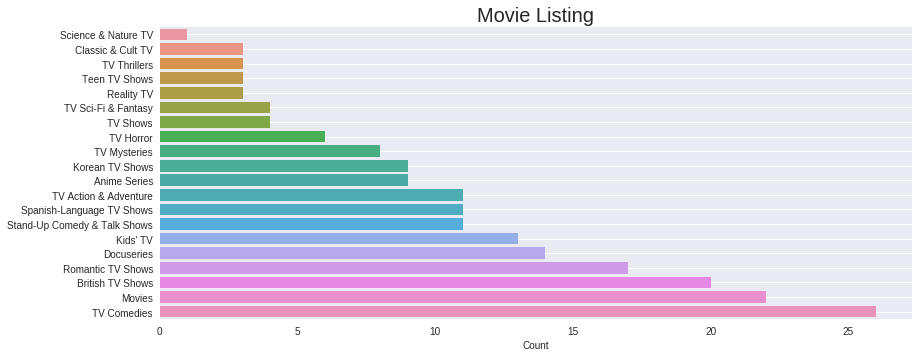

In [54]:
import plotly.graph_objects as go
from collections import Counter
col = "listed_in"
categories = ", ".join(df['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
plt.figure(figsize=(12,5))
sns.barplot(values[0:20],labels[0:20]);
plt.xlabel('Count',fontsize=10)
#plt.ylabel('',fontsize=20)
plt.title('Movie Listing',fontsize=20)
#ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

More of the listings are in the Catogery International TV Shows,TV Drama and Movies

# 4.Conclusion 

1.This data set had text data so we tried to get insights from the text data.We saw from the Content chart that for the year 2019 more content update happened in the month of August and May.So 98 % items in the dataset are movies and remaining small percentage is TV show.

2.Exploring the movie ratings we could conclude 33% Fall in catogery TV-MA ("TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only).23% fall in catigery TV-14 (Programs rated TV-14 contains material that parents or adult guardians may find unsuitable for children under the age of 14).12.5 % fall in category TV-PG (TV-PG: Parental guidance suggested. This program contains material that parents may find unsuitable for younger children)

3.Based on the country we could conclude most movies are from Hollywood (USA),Bollywood (India) and British Film industry.

4.From the date data we could conclude that every year the movie count is increasing indicating that popularity of Netfilx is increasing every year.We see more movies are added in the month of September followed by October and March.Love,Man,Christmas etc are some of the most prominent words for movie Title.

5.From the reviews we can conclude that the many reviews are in te ranged 140 to 150 words.The length of the reviews remains almost same for different ratinngs.Very few description has more than 155 words.

6.From the sentiment analysis we can conclude we can say that the sentiment expressed about the movies in the description is slightly towards positive.We can almost conclude that people are not happy with at least 40% of the movies.

7.We plotted unigrams and bigrams and could identify most used words.Life,Young and Man are the top three words in the unigram plot.Years Old,Young Man,Young Woman are the most represented words in the bigrams.The word young shows may be the movies are more about young people.More of the listings are in the Catogery International TV Shows,TV Drama and Movies

# TO BE CONTINUED